In [65]:
import pandas as pd

# Example 2: Raw string
dataset_path = r"C:\Users\ASUS\Downloads\new_nutritional_info_first_1000_rows.csv"

# Read the dataset into a Pandas DataFrame
data = pd.read_csv(dataset_path, nrows=1000)
dataset = data.drop(['title'], axis=1)


In [66]:
dataset

,energy,fat,protein,salt,saturates,sugars,remarks
0,81.129461,2.140139,6.914437,0.055978,0.365347,5.086341,1
1,477.096404,23.412486,7.625492,0.548621,3.425054,14.298443,1
2,208.058983,14.297046,15.383456,1.063915,4.535687,3.048951,0
3,194.752596,15.980767,11.946687,0.614843,2.366704,0.314583,1
4,303.435400,5.094847,5.067961,0.019791,2.048394,63.210605,0
...,...,...,...,...,...,...,...
995,152.325434,0.380814,2.539602,0.512213,0.136801,22.329869,0
996,84.203441,3.922226,2.598868,1.202608,2.357696,0.957502,0
997,81.510535,0.198088,0.669822,0.005346,0.041864,17.411232,0
998,44.917695,0.056254,0.089726,0.036829,0.008080,10.102857,1


In [67]:
import pandas as pd
import numpy as np
# first neural network with keras tutorial
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

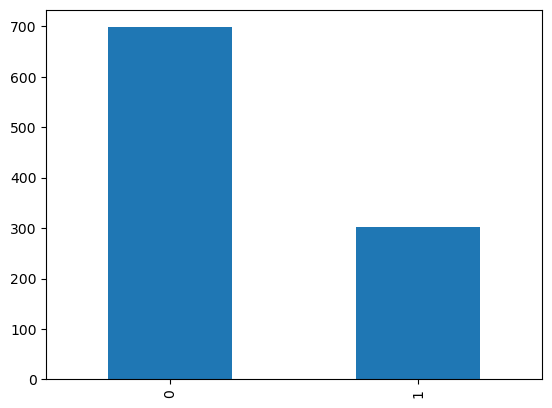

In [68]:
import seaborn as sns
dataset['remarks'].value_counts().plot(kind='bar')
#input and output variables
X = dataset.iloc[:,0:6]
Y = dataset.iloc[:,6]

In [69]:
X

,energy,fat,protein,salt,saturates,sugars
0,81.129461,2.140139,6.914437,0.055978,0.365347,5.086341
1,477.096404,23.412486,7.625492,0.548621,3.425054,14.298443
2,208.058983,14.297046,15.383456,1.063915,4.535687,3.048951
3,194.752596,15.980767,11.946687,0.614843,2.366704,0.314583
4,303.435400,5.094847,5.067961,0.019791,2.048394,63.210605
...,...,...,...,...,...,...
995,152.325434,0.380814,2.539602,0.512213,0.136801,22.329869
996,84.203441,3.922226,2.598868,1.202608,2.357696,0.957502
997,81.510535,0.198088,0.669822,0.005346,0.041864,17.411232
998,44.917695,0.056254,0.089726,0.036829,0.008080,10.102857


In [70]:
Y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    1
999    0
Name: remarks, Length: 1000, dtype: int64

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross Validation Scores are [0.93  0.96  0.945 0.925 0.895]
Average Cross Validation score :0.9309999999999998


In [72]:
#create train and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(900, 6) (900,)
(100, 6) (100,)


In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
# define the keras model layer by layer
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers

model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [75]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
# fit the keras model on the dataset
history = model.fit(X_train, Y_train, epochs=300, batch_size=10, validation_data=(X_test,Y_test))

Epoch 1/300
90/90 [==============================] - 3s 15ms/step - loss: 0.6701 - accuracy: 0.7522 - val_loss: 0.6290 - val_accuracy: 0.8500
Epoch 2/300
90/90 [==============================] - 1s 8ms/step - loss: 0.5423 - accuracy: 0.8500 - val_loss: 0.4836 - val_accuracy: 0.8500
Epoch 3/300
90/90 [==============================] - 1s 9ms/step - loss: 0.4030 - accuracy: 0.8733 - val_loss: 0.3722 - val_accuracy: 0.8800
Epoch 4/300
90/90 [==============================] - 1s 8ms/step - loss: 0.3211 - accuracy: 0.8778 - val_loss: 0.3010 - val_accuracy: 0.9100
Epoch 5/300
90/90 [==============================] - 1s 8ms/step - loss: 0.2800 - accuracy: 0.8856 - val_loss: 0.2623 - val_accuracy: 0.9300
Epoch 6/300
90/90 [==============================] - 1s 9ms/step - loss: 0.2547 - accuracy: 0.9000 - val_loss: 0.2534 - val_accuracy: 0.9000
Epoch 7/300
90/90 [==============================] - 1s 10ms/step - loss: 0.2381 - accuracy: 0.8989 - val_loss: 0.2230 - val_accuracy: 0.9200
Epoch 8/300

Epoch 59/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0946 - accuracy: 0.9744 - val_loss: 0.1557 - val_accuracy: 0.9800
Epoch 60/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0939 - accuracy: 0.9711 - val_loss: 0.1390 - val_accuracy: 0.9700
Epoch 61/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0965 - accuracy: 0.9722 - val_loss: 0.1770 - val_accuracy: 0.9700
Epoch 62/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0959 - accuracy: 0.9700 - val_loss: 0.1533 - val_accuracy: 0.9800
Epoch 63/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0933 - accuracy: 0.9689 - val_loss: 0.1381 - val_accuracy: 0.9600
Epoch 64/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0955 - accuracy: 0.9722 - val_loss: 0.1474 - val_accuracy: 0.9800
Epoch 65/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0915 - accuracy: 0.9722 - val_loss: 0.1528 - val_accuracy: 0.9800
Epoch 

90/90 [==============================] - 1s 10ms/step - loss: 0.0596 - accuracy: 0.9811 - val_loss: 0.2628 - val_accuracy: 0.9700
Epoch 174/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0575 - accuracy: 0.9833 - val_loss: 0.2748 - val_accuracy: 0.9600
Epoch 175/300
90/90 [==============================] - 1s 9ms/step - loss: 0.0611 - accuracy: 0.9822 - val_loss: 0.2679 - val_accuracy: 0.9600
Epoch 176/300
90/90 [==============================] - 1s 10ms/step - loss: 0.0579 - accuracy: 0.9822 - val_loss: 0.3450 - val_accuracy: 0.9500
Epoch 177/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0605 - accuracy: 0.9811 - val_loss: 0.2569 - val_accuracy: 0.9700
Epoch 178/300
90/90 [==============================] - 1s 10ms/step - loss: 0.0572 - accuracy: 0.9833 - val_loss: 0.3048 - val_accuracy: 0.9600
Epoch 179/300
90/90 [==============================] - 1s 14ms/step - loss: 0.0575 - accuracy: 0.9822 - val_loss: 0.2798 - val_accuracy: 0.9600
Epoch 180

90/90 [==============================] - 1s 8ms/step - loss: 0.0384 - accuracy: 0.9856 - val_loss: 0.5238 - val_accuracy: 0.9700
Epoch 288/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0366 - accuracy: 0.9878 - val_loss: 0.5006 - val_accuracy: 0.9600
Epoch 289/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0393 - accuracy: 0.9889 - val_loss: 0.5190 - val_accuracy: 0.9700
Epoch 290/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0434 - accuracy: 0.9811 - val_loss: 0.4337 - val_accuracy: 0.9700
Epoch 291/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0448 - accuracy: 0.9844 - val_loss: 0.5316 - val_accuracy: 0.9700
Epoch 292/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0358 - accuracy: 0.9867 - val_loss: 0.5460 - val_accuracy: 0.9600
Epoch 293/300
90/90 [==============================] - 1s 8ms/step - loss: 0.0367 - accuracy: 0.9900 - val_loss: 0.5492 - val_accuracy: 0.9600
Epoch 294/300

In [77]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, Y_train)
print('Train_Accuracy: %.2f' % (accuracy*100))

29/29 [==============================] - 1s 7ms/step - loss: 0.0344 - accuracy: 0.9900
Train_Accuracy: 99.00


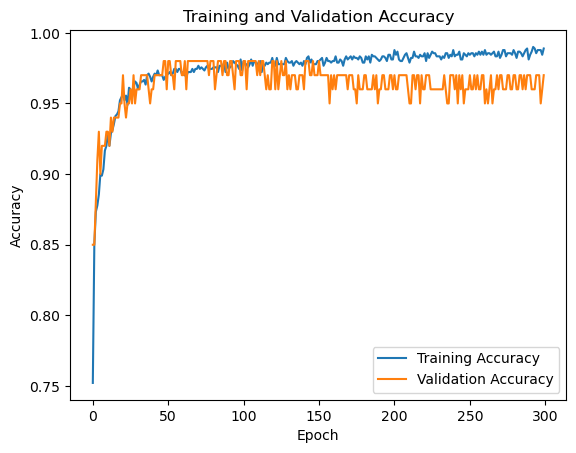

In [78]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

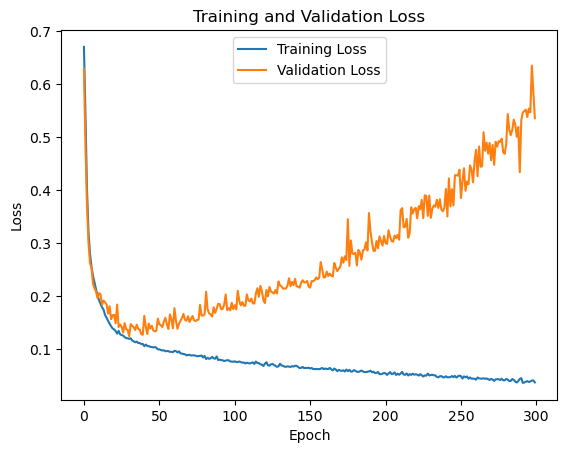

In [79]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
loss, accuracy = model.evaluate(X_train, Y_train)
print('Train_Accuracy: %.2f' % (accuracy*100))
print(f"Loss: {loss:.4f}")

29/29 [==============================] - 0s 7ms/step - loss: 0.0645 - accuracy: 0.9756
Train_Accuracy: 97.56
Loss: 0.0645


In [80]:
# Save the model to a file
model.save("model_test.h5")

# evaluate the keras model
_, accuracy = model.evaluate(X_train, Y_train)
print('Train_Accuracy: %.2f' % (accuracy * 100))

29/29 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.9900
Train_Accuracy: 99.00


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
dataset_path = "C:/Users/ASUS/Downloads/new_nutritional_info_first_1000_rows.csv"
data = pd.read_csv(dataset_path)
data = data.drop(['title'], axis=1)

# Convert columns to numeric format, handling errors
data['fat'] = pd.to_numeric(data['fat'], errors='coerce')
data['protein'] = pd.to_numeric(data['protein'], errors='coerce')
data['salt'] = pd.to_numeric(data['salt'], errors='coerce')
data['saturates'] = pd.to_numeric(data['saturates'], errors='coerce')
data['sugars'] = pd.to_numeric(data['sugars'], errors='coerce')

# Drop rows with NaN values resulting from conversion
data.dropna(inplace=True)

# Preprocess the data and create 'remarks' column
data['remarks'] = ((data['fat'] <= 25) & 
                   (data['protein'] <= 19) & 
                   (data['salt'] <= 0.99) & 
                   (data['saturates'] <= 9) & 
                   (data['sugars'] <= 13)).astype(int)

# Drop the 'energy' column as it's not needed
data.drop(columns=['energy'], inplace=True)

# Separate features and target variable
X = data.drop(columns=['remarks']).values.astype(np.float32)  # Ensure data type is float32
y = data['remarks'].values.astype(np.int)  # Ensure data type is int

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10820\4002206292.py:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = data['remarks'].values.astype(np.int)  # Ensure data type is int


Epoch 1/100
23/23 [==============================] - 3s 46ms/step - loss: 0.4116 - accuracy: 0.7708 - val_loss: 0.4416 - val_accuracy: 0.7375
Epoch 2/100
23/23 [==============================] - 0s 14ms/step - loss: 0.3425 - accuracy: 0.8000 - val_loss: 0.3799 - val_accuracy: 0.7250
Epoch 3/100
23/23 [==============================] - 0s 14ms/step - loss: 0.3246 - accuracy: 0.8319 - val_loss: 0.3882 - val_accuracy: 0.7500
Epoch 4/100
23/23 [==============================] - 0s 15ms/step - loss: 0.3124 - accuracy: 0.8333 - val_loss: 0.3452 - val_accuracy: 0.7625
Epoch 5/100
23/23 [==============================] - 0s 14ms/step - loss: 0.2992 - accuracy: 0.8417 - val_loss: 0.3351 - val_accuracy: 0.7625
Epoch 6/100
23/23 [==============================] - 0s 18ms/step - loss: 0.2858 - accuracy: 0.8514 - val_loss: 0.3235 - val_accuracy: 0.8625
Epoch 7/100
23/23 [==============================] - 0s 15ms/step - loss: 0.2674 - accuracy: 0.8681 - val_loss: 0.2944 - val_accuracy: 0.8500
Epoch 

In [94]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Train Accuracy:", accuracy)

7/7 [==============================] - 0s 6ms/step - loss: 0.1274 - accuracy: 0.9350
Train Accuracy: 0.9350000023841858


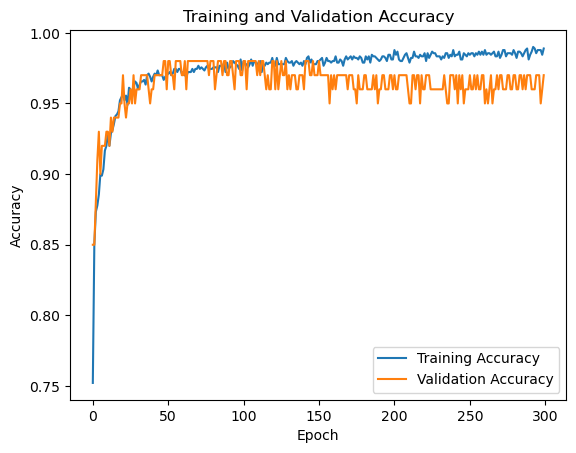

In [87]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

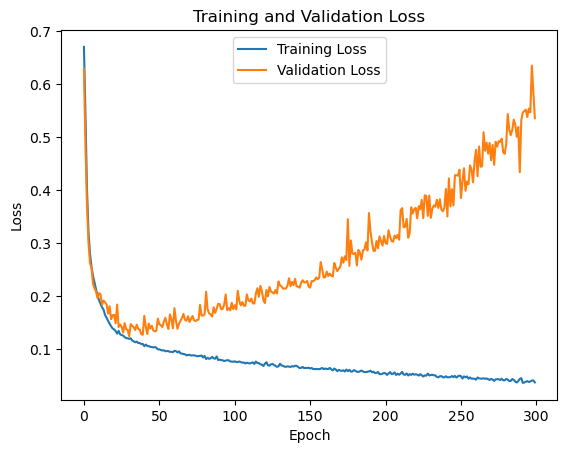

In [88]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
# Save the model to a file
model.save("model_test.h5")

